# FtMidnight genome map

In [1]:
import dna_features_viewer as dfv
from Bio import SeqIO
import matplotlib.pyplot as plt

In [2]:
gb = '../data/F_genomes/FtMidnight.gb'

## Make record start in terminase

In [3]:
record = list(SeqIO.parse(gb, 'genbank'))[0]

def find_terminase(record, keyword='terminase'):
    results = []
    for feature in record.features:
        if feature.type == 'CDS':
            product_str = ' '.join(feature.qualifiers['product'])
            if keyword in product_str:
                results.append([product_str, feature.location])
    
    return results

term = find_terminase(record, keyword='terminase')
new_start = term[0][1].start

rotated = record[new_start:] + record[:new_start]

In [4]:
# from: https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer/issues/8
class CustomTranslator(dfv.BiopythonTranslator):
    def compute_feature_label(self, feature):
        if feature.type == "CDS":
            return feature.qualifiers['product'][0]
        else:
            # Return the default label:
            return dfv.BiopythonTranslator.compute_feature_label(self, feature)

In [7]:
# translate record
translator = CustomTranslator()
graphic_record = translator.translate_record(rotated)

# general aesthetics 
graphic_record.feature_level_height = 0

# specific aesthetics
for feature in graphic_record.features:
    feature.color = '#f2f2f2'
    if 'tail ' in feature.label:
        feature.color = 'green'
    else:
        feature.label = None

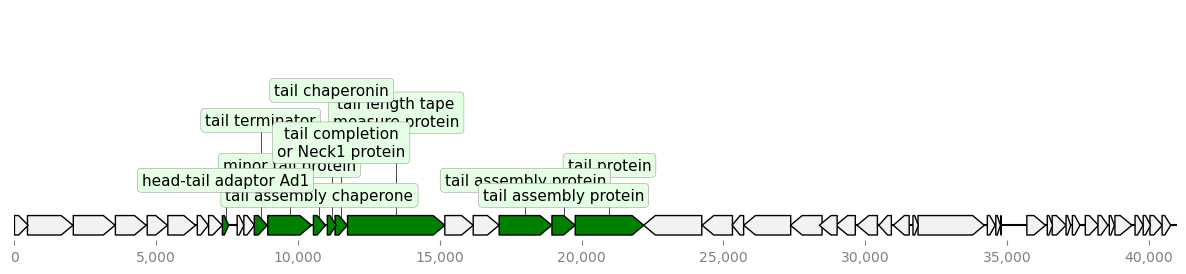

In [8]:
fig, axs = plt.subplots(1, 1,
                        figsize=(15,3))


# gene map
graphic_record.plot(ax=axs,
                    with_ruler=True,
                    annotate_inline=True)

#plt.savefig('../data/svg/FtMidnight.svg')
plt.show()